In [1]:
from scipy.stats import norm
import numpy as np
from scipy.stats import chisquare
import scipy.stats as stats
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import t

#### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [2]:
#given
sample_m = 50
sample_s = 5

# lets sample size
n = 50

# Confidence level
CL = 0.95

std_error = sample_s / (n ** 0.5)

z_score = norm.ppf((1 + CL) / 2)

# Calculate the lower and upper bounds of the confidence interval
l_bound = sample_m - z_score * std_error
u_bound = sample_m + z_score * std_error

# Print the results
print(l_bound.round(3), u_bound.round(3))

48.614 51.386


#### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

In [3]:
# colors in %
observed = np.array([20, 20, 20, 10, 10, 20])

# Exp fre of colors
exp = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * sum(observed)

# stats and p-value
stat, pval = chisquare(observed, exp)

# significance level
alpha = 0.05

print("Chi-square  :", stat)
print("P-value:", pval.round(3))

if pval < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Chi-square  : 0.0
P-value: 1.0
Fail to reject the null hypothesis.



#### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data:
||Group A|Group B|
|----|-----|-----|
|Outcome 1|20|15|
|Outcome 2|10|25|
|Outcome 3|15|20|

Interpret the results of the test.

In [4]:
l1 = [20,10,15]
l2 = [15,25,20]


stat_, pval_ = chisquare(l1)
print(f"Chi-square test for group A {stat_.round(2)}")
print(f"P-value for group A {pval_.round(2)}")


stat_2, pval_2 = chisquare(l2)
print(f"Chi-square test for group A {stat_2.round(2)}")
print(f"P-value for group A {pval_2.round(2)}")



Chi-square test for group A 3.33
P-value for group A 0.19
Chi-square test for group A 2.5
P-value for group A 0.29



#### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [5]:
n = 500
x = 60

p = x / n

CL = 0.95

l, u = proportion_confint(x, n, alpha=1-CL)

print(l, u)


0.09151638887130707 0.1484836111286929



#### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [6]:
# given
#simple mean
x_bar = 75

# Sample standard deviation
s = 12

# Sample size
n = 50

# dof
df = n - 1

# Confidence level
CL = 0.90

# Calculate the standard error of the mean
std_error = s / (n ** 0.5)

# Calculate the t-value
t_val = stats.t.ppf(1 - ((1 - CL) / 2), df)

# Calculate the confidence interval
l = x_bar - t_val * std_error
u = x_bar + t_val * std_error

# Print the results
print(l, u)

72.15479878877537 77.84520121122463



#### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

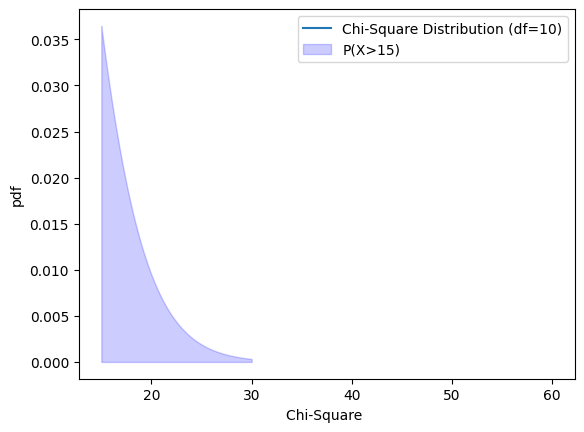

In [7]:
#dof
df = 10

chi_test = stats.chi2(df)

# Plot the chi-square distribution
plt.plot(x, chi_test.pdf(x), label='Chi-Square Distribution (df=10)')

# Shade the area corresponding to a chi-square statistic of 15
x_fill = np.linspace(15, 30, 1000)
plt.fill_between(x_fill, chi_test.pdf(x_fill), color='blue', alpha=0.2, label='P(X>15)')


plt.xlabel('Chi-Square ')
plt.ylabel('pdf')
plt.legend()

plt.show()




#### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [8]:
# number of people
n_people = 1000

# Set the hypothesized probability of coke
p_hypo = 0.52

result = np.random.binomial(1, p_hypo, n_people)

# Calculate the number of coke
coke = np.sum(result)

# Calculate the proportion of coke
pepsi = coke / n_people

# Set the significance level
alpha = 0.01

# Calculate the critical value for a two-tailed test
crit_val = stats.norm.ppf(1 - alpha/2)

# Calculate the standard error
se = np.sqrt(p_hypo * (1 - p_hypo) / n_people)

# Calculate the test statistic
z_stat = (pepsi - p_hypo) / se

# Calculate the p-value
p_val = stats.norm.sf(abs(z_stat)) * 2


print("Number of coke:", coke)
print("Proportion of pepsi:", pepsi)
print("Critical value:", crit_val)
print("Test statistic:", z_stat)
print("p-value:", p_val)

# null hypothesis is rejected or not rejected check
if abs(z_stat) > crit_val or p_val < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Number of coke: 521
Proportion of pepsi: 0.521
Critical value: 2.5758293035489004
Test statistic: 0.06329621044272922
p-value: 0.9495306333430359
Fail to reject null hypothesis


#### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [9]:
obs_frequency = np.array([45, 55])
exp_frequency = np.array([50, 50])   # in case of fair coin

# Calculate the chi-square test statistic and p-value
chi2_statistic, p_value = chisquare(obs_frequency, exp_frequency)

# given the significance level
alpha = 0.05

# Print the results
print('Observed frequencies:', obs_frequency)
print('Expected frequencies:', exp_frequency)
print('Chi-square statistic:', chi2_statistic)
print('p-value:', p_value)

# Check if the null hypothesis is rejected
if p_value < alpha:
    print('The null hypothesis is rejected.')
else:
    print('The null hypothesis is not rejected. ')


Observed frequencies: [45 55]
Expected frequencies: [50 50]
Chi-square statistic: 1.0
p-value: 0.31731050786291115
The null hypothesis is not rejected. 



#### Q9. A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.
||Lung Cancer: Yes|Lung Cancer: No|
|----|-----|-----|
|Smoker|60|140|
|Non-smoker|30|170|

Use a significance level of 0.05.


In [10]:
smoker = np.array([60, 140])
non_smoker = np.array([30, 170])  

# Calculate the chi-square test statistic and p-value
chi2_statistic, p_value = chisquare(smoker, non_smoker)

# given the significance level
alpha = 0.05

# Print the results
print('Chi-square statistic:', chi2_statistic)
print('p-value:', p_value)

# Check if the null hypothesis is rejected
if p_value < alpha:
    print('The null hypothesis is rejected.')
else:
    print('The null hypothesis is not rejected. ')


Chi-square statistic: 35.294117647058826
p-value: 2.834869930488155e-09
The null hypothesis is rejected.


#### Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

||Milk Chocolate|Dark Chocolate|White Chocolate|
|----|----|----|----|
|U.S. (n=500)|200|150|150|
|U.K. (n=500)|225|175|100|




Use a significance level of 0.01.

In [11]:
# given table
observed_freq = np.array([[200,150,150], [225,175,100]])

#  expected frequencies 
row_sum = observed_freq.sum(axis=1)
col_sum = observed_freq.sum(axis=0)
total_sum = observed_freq.sum()
expected_freq = np.outer(row_sum, col_sum) / total_sum

# Calculate the chi-square and p-value
chi2_statistic, p_value, dof, expected = chi2_contingency(observed_freq)

# give significance level
alpha = 0.05

print('Chi-square statistic:', chi2_statistic)
print('p-value:', p_value)

# Check if the null hypothesis
if p_value < alpha:
    print('The null hypothesis is rejected.')
else:
    print('The null hypothesis is not rejected..')


Chi-square statistic: 13.393665158371041
p-value: 0.0012348168997745918
The null hypothesis is rejected.



#### Q11. A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05.

In [12]:
# given
sample_size = 30;x_bar = 72;sample_std = 10;pop_mean = 70

# Calculate the t-test statistic and p-value
t_stats = (x_bar - pop_mean) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - t.cdf(abs(t_stats), sample_size - 1))

# Define the significance level
alpha = 0.05

# Print the results
print('Sample size:', sample_size)
print('Sample mean:', x_bar)
print('Sample standard deviation:', sample_std)
print('Hypothesized population mean:', pop_mean)
print('t-test statistic:', t_stats)
print('p-value:', p_value)

# rejected or not rejected
if p_value < alpha:
    print('The null hypothesis is rejected.')
else:
    print('The null hypothesis is not rejected.')


Sample size: 30
Sample mean: 72
Sample standard deviation: 10
Hypothesized population mean: 70
t-test statistic: 1.0954451150103321
p-value: 0.2823362372860698
The null hypothesis is not rejected.
